## 1.1
### 2

O algoritmo que implementa o método de Newton é

In [2]:
# x: Valor inicial
# f: Função f(x)
# f_linha: Derivada da função f(x)
# n: Número de interações que serão feitas
function newton(x,f,f_linha,n)
    # Método de newton sendo aplicado. A cada iteração, temos uma aproximação melhor.
    # Itera de 1 até n
    for i in 1:n
        x = x - f(x)/f_linha(x)
    end
    # Retorna a aproximação desejada
    return x
end

newton (generic function with 1 method)

A função que nos interessa é $f(x) = \ln(3x)$ quando $x=1$. Tornando ambos os lados como o expoente da função $e$, temos
\begin{align*}
e^{f(1)} = 3
\end{align*}
pois x = 1. Isolando o 3
\begin{align*}
e^{f(1)} - 3 = 0
\end{align*}
Dessa forma, procuramos a raiz da função
\begin{align*}
g(y)=e^y-3 
\end{align*}
onde $y = f(1) = \ln(3)$. Utilizando o resultado acima, podemos utilizar o método de Newton para aproximar $\ln(3)$. Dessa forma, precisamos da primeira derivada, ou seja
$$
g'(y) = e^y
$$
e também do chute inicial. Para o chute inicial, sabemos que a raiz está entre $g(0)=-2$ e $g(2)\approx4.3890$, sendo assim, tomando a média desses dois resultados, podemos supor um chute inicial $y=1.1945$. O algoritmo será

In [ ]:
# Função f
g(y) = exp(y) - 3

# Derivada da função g
g_linha(y) = exp(y)

# Número de passos
n = 20

# Chute inical
y = 1.1945

# Imprime o resultado
print(newton(y,g,g_linha,n))

## 1.2

In [13]:
using LinearAlgebra

function regressao(pontos, grau)
    n_eq =  length(pontos)
    n_col = grau + 1
    
    V = zeros(n_eq, n_col)
    y = zeros(n_eq)
    
    for i in 1:n_eq
        y[i] = pontos[i][2]
        for j in 1:n_col
            V[i,j] = pontos[i][1]^(j-1)
        end
    end
    return V\y
end

regressao (generic function with 1 method)

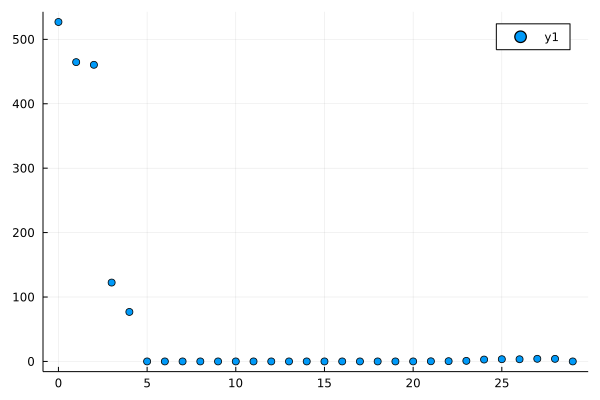

In [68]:
using Plots
using Distributions

# Polinômio de grau 5 
f(x) = x^(5)-x^(4)-x^(3)+x^(2)+x+1

# 
xs = rand(Uniform(-5, 5), 30)
xs = sort(xs)
pontos = map((x) -> (x, f(x)), xs)

function g(coefs, x)
    y = 0
    for i in 1:length(coefs)
        y = y + coefs[i]*x^(i-1)
    end
    return y
end
# Contradomínio. (Erros)
Y = []
n_pontos = length(pontos)
grau_lim = 29

for i in 0:grau_lim
    erro = 0
    coefs = regressao(pontos,i)
    # Para cada ponto
    for j in 1:n_pontos
        x = pontos[j][1]
        # Soma os erros em cada ponto
        erro = erro + abs(g(coefs,x) - f(x))
    end
    # Média
    erro = erro / n_pontos
    push!(Y,erro)
end

# Graus
X = 0:grau_lim

scatter(X,Y)

In [60]:
Y = []
push!(3,Y)
print(Y)

LoadError: MethodError: no method matching push!(::Int64, ::Vector{Any})
[0mClosest candidates are:
[0m  push!(::Any, ::Any, [91m::Any[39m) at abstractarray.jl:2387
[0m  push!(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at abstractarray.jl:2388
[0m  push!([91m::DataStructures.CircularDeque[39m, ::Any) at /home/matheus/.julia/packages/DataStructures/vSp4s/src/circ_deque.jl:55
[0m  ...